## Import Packages


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
pd.set_option('display.max_columns', None)
%matplotlib inline

## Data Loading

In [70]:
# Load and display top few rows
airbnb_data_cleaned = pd.read_csv('airbnb_data_cleaned.csv', index_col=0).reset_index(drop=True)
airbnb_data_cleaned.head(5)

,name,host_id,host_since,host_since_readable,host_tenure_days,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_verifications,verifications_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bathrooms_number,bedrooms,beds,amenities,amenities_count,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,has_reviews
0,Huge Four Bedroom Apartment,1389063,2011-11-09,"November 09, 2011",5056,within an hour,0.86,1.0,0,12,"['email', 'phone']",2,1,1,Lewisham,51.44306,-0.01948,Entire rental unit,Entire home/apt,10,2 baths,2.0,4,8,"[""Cooking basics"", ""Washer"", ""Iron"", ""Smoke al...",35,297.0,3,365,13,15,31,293,68,12,1,134,110,32670.0,4.68,4.65,4.72,4.84,4.74,4.62,4.72,1,11,11,0,0,0.51,1
1,One Bedroom Apartment,1389063,2011-11-09,"November 09, 2011",5056,within an hour,0.86,1.0,0,12,"['email', 'phone']",2,1,1,Lewisham,51.44284,-0.01997,Entire rental unit,Entire home/apt,2,1 bath,1.0,1,2,"[""Cooking basics"", ""Wine glasses"", ""Iron"", ""Sm...",44,98.0,3,365,0,13,43,318,24,4,0,157,37,3626.0,4.58,4.42,4.54,4.58,4.25,4.54,4.42,1,11,11,0,0,0.22,1
2,Two Bedroom Newly Refurbished Apartment,1389063,2011-11-09,"November 09, 2011",5056,within an hour,0.86,1.0,0,12,"['email', 'phone']",2,1,1,Lewisham,51.44359,-0.02275,Entire rental unit,Entire home/apt,4,1 bath,1.0,2,3,"[""Cooking basics"", ""Iron"", ""Smoke alarm"", ""Fir...",27,148.0,3,365,3,6,27,302,58,6,0,141,55,8140.0,4.50,4.50,4.45,4.72,4.52,4.36,4.38,1,11,11,0,0,0.43,1
3,Refurbished Two Bedroom Apartment,1389063,2011-11-09,"November 09, 2011",5056,within an hour,0.86,1.0,0,12,"['email', 'phone']",2,1,1,Lewisham,51.44355,-0.02309,Entire rental unit,Entire home/apt,5,1 bath,1.0,2,5,"[""Cooking basics"", ""Iron"", ""Smoke alarm"", ""Fir...",29,144.0,3,365,11,33,53,328,36,7,0,167,64,9216.0,4.64,4.67,4.58,4.83,4.61,4.50,4.47,1,11,11,0,0,0.30,1
4,Spacious refurbished 2 bedroom apt with balcony,1389063,2011-11-09,"November 09, 2011",5056,within an hour,0.86,1.0,0,12,"['email', 'phone']",2,1,1,Lewisham,51.44333,-0.02307,Entire rental unit,Entire home/apt,4,2 baths,2.0,2,4,"[""Cooking basics"", ""Washer"", ""Iron"", ""Smoke al...",35,157.0,3,365,0,9,11,255,54,4,0,101,37,5809.0,4.68,4.78,4.65,4.81,4.74,4.37,4.59,1,11,11,0,0,0.35,1


## Dataset Overview

In [71]:
# Verify the shape and datatypes of the data
print("Data Shape:", airbnb_data_cleaned.shape)
print("Data Info:")
airbnb_data_cleaned.info()

Data Shape: (57927, 53)
Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57927 entries, 0 to 57926
Data columns (total 53 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   name                                          57927 non-null  object 
 1   host_id                                       57927 non-null  int64  
 2   host_since                                    57927 non-null  object 
 3   host_since_readable                           57927 non-null  object 
 4   host_tenure_days                              57927 non-null  int64  
 5   host_response_time                            57927 non-null  object 
 6   host_response_rate                            57927 non-null  float64
 7   host_acceptance_rate                          57927 non-null  float64
 8   host_is_superhost                             57927 non-null  int64  
 9   host_total_listings_count 

# Type Coversions

In [72]:
# Convert 'host_since' column to datetime
airbnb_data_cleaned['host_since'] = pd.to_datetime(airbnb_data_cleaned['host_since'], format='%Y-%m-%d')
print("'host_since' Data Type:", airbnb_data_cleaned['host_since'].dtype)

# Convert bathroom_number column to integer
airbnb_data_cleaned['bathrooms_number'] = airbnb_data_cleaned['bathrooms_number'].astype(int)
print("'bathrooms_number' Data Type:", airbnb_data_cleaned['bathrooms_number'].dtype)



'host_since' Data Type: datetime64[ns]
'bathrooms_number' Data Type: int64


## Check for Missing Values Before EDA

In [73]:
# Check for missing values
missing_values = airbnb_data_cleaned.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
name                                            0
host_id                                         0
host_since                                      0
host_since_readable                             0
host_tenure_days                                0
host_response_time                              0
host_response_rate                              0
host_acceptance_rate                            0
host_is_superhost                               0
host_total_listings_count                       0
host_verifications                              0
verifications_count                             0
host_has_profile_pic                            0
host_identity_verified                          0
neighbourhood_cleansed                          0
latitude                                        0
longitude                                       0
property_type                                   0
room_type                                       0
accommodates           

# Descriptive Statistics

In [74]:
# Calculate Descriptive Statistics
airbnb_data_cleaned.describe()

,host_id,host_since,host_tenure_days,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,verifications_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bathrooms_number,bedrooms,beds,amenities_count,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,has_reviews
count,5.792700e+04,57927,57927.000000,57927.000000,57927.000000,57927.000000,57927.000000,57927.000000,57927.000000,57927.000000,57927.000000,57927.000000,57927.000000,57927.000000,57927.000000,57927.000000,57927.000000,57927.000000,57927.000000,57927.000000,57927.000000,57927.000000,57927.000000,57927.000000,57927.000000,57927.000000,57927.000000,57927.000000,57927.000000,5.792700e+04,57927.000000,57927.000000,57927.000000,57927.000000,57927.000000,57927.000000,57927.000000,57927.000000,57927.000000,57927.000000,57927.000000,57927.000000,57927.000000,57927.000000
mean,2.622396e+08,2018-12-07 13:04:26.797866496,2470.455245,0.813574,0.756518,0.236867,108.082000,2.000949,0.942980,0.921384,51.509509,-0.128982,3.534241,1.289623,1.557184,1.952268,31.425225,216.178673,4.869284,410.985292,11.857994,28.564814,48.571633,205.298600,22.180192,7.709462,0.708461,120.376750,61.349302,1.119697e+04,3.822376,3.851509,3.803312,3.904289,3.923151,3.861442,3.759261,0.367290,21.230566,18.638372,2.523366,0.032196,0.975420,0.816700
min,2.594000e+03,2008-08-28 00:00:00,96.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,51.295937,-0.496075,1.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.265321e+07,2015-09-03 00:00:00,1091.000000,0.890000,0.610000,0.000000,2.000000,2.000000,1.000000,1.000000,51.485890,-0.191192,2.000000,1.000000,1.000000,1.000000,19.000000,77.000000,1.000000,90.000000,3.000000,11.000000,24.000000,89.000000,1.000000,0.000000,0.000000,64.000000,0.000000,0.000000e+00,4.060000,4.200000,4.000000,4.370000,4.440000,4.270000,4.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.080000,1.000000
50%,2.017206e+08,2018-07-12 00:00:00,2619.000000,1.000000,0.960000,0.000000,5.000000,2.000000,1.000000,1.000000,51.513196,-0.132894,3.000000,1.000000,1.000000,2.000000,32.000000,135.000000,2.000000,365.000000,9.000000,26.000000,49.000000,220.000000,5.000000,2.000000,0.000000,135.000000,20.000000,2.781000e+03,4.750000,4.790000,4.710000,4.860000,4.900000,4.770000,4.650000,0.000000,3.000000,1.000000,0.000000,0.000000,0.510000,1.000000
75%,4.799357e+08,2022-09-17 00:00:00,3662.000000,1.000000,1.000000,0.000000,24.000000,2.000000,1.000000,1.000000,51.536930,-0.069491,4.000000,1.000000,2.000000,2.000000,42.000000,227.000000,3.000000,365.000000,21.000000,47.000000,75.000000,320.000000,22.000000,9.000000,1.000000,179.000000,92.000000,1.201200e+04,4.960000,4.980000,4.950000,5.000000,5.000000,4.960000,4.870000,1.000000,14.000000,10.000000,1.000000,0.000000,1.290000,1.000000
max,7.001298e+08,2025-06-08 00:00:00,6224.000000,1.000000,1.000000,1.000000,8723.000000,3.000000,1.000000,1.000000,51.682630,0.278960,16.000000,30.000000,50.000000,50.000000,104.000000,74100.000000,999.000000,9011.000000,30.000000,60.000000,90.000000,365.000000,1855.000000,355.000000,41.000000,205.000000,255.000000,1.479000e+07,5.000000,5.000000,5.000000,5.000000,5.000000,5.

## Univariate Analysis

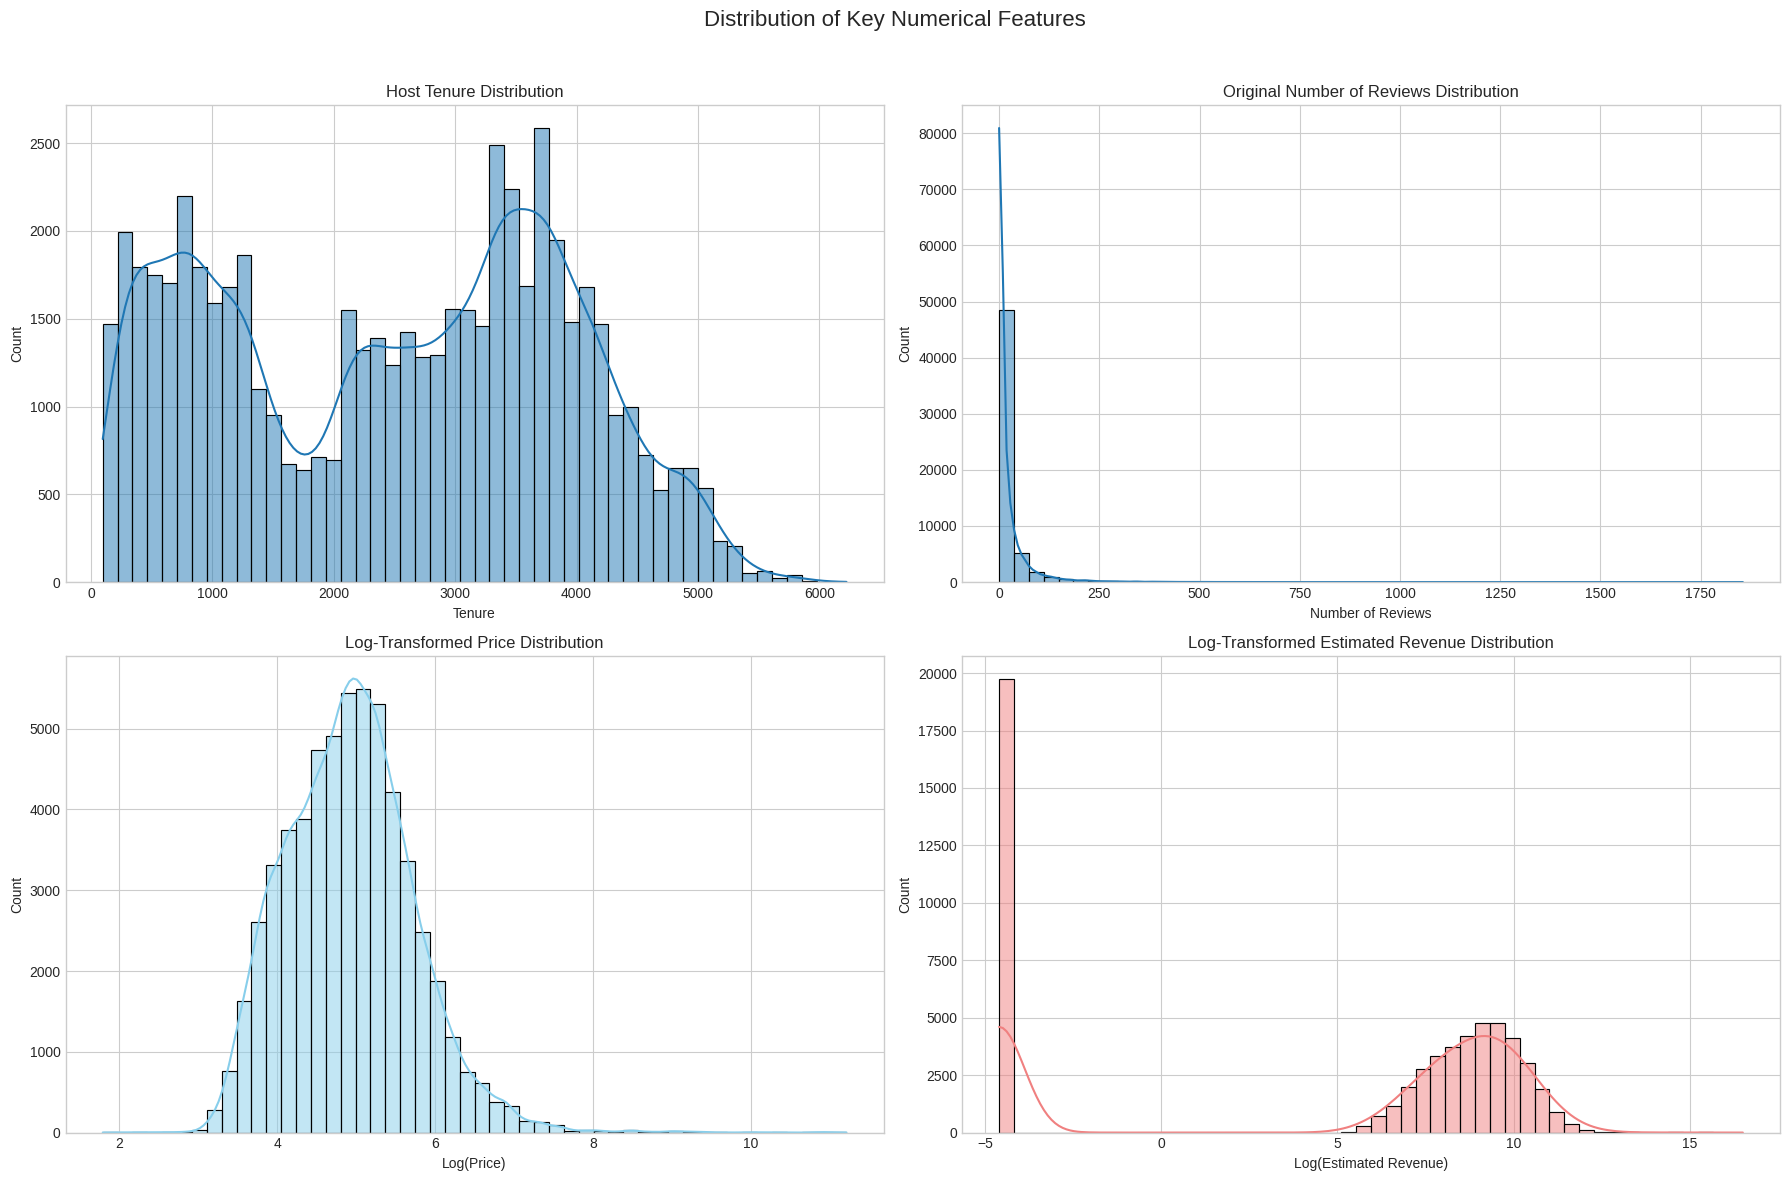

In [75]:

# To ensure the log transformation works, we'll add a tiny value to any zero values.
# This prevents log(0) which is undefined.
for col in ['number_of_reviews', 'estimated_revenue_l365d']:
    airbnb_data_cleaned[col] = airbnb_data_cleaned[col].apply(lambda x: x if x > 0 else 0.01)

# --- Improved Visualization Code ---
# We will use a 2x2 grid to show both the original and log-transformed distributions
# for a direct comparison.

plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Distribution of Key Numerical Features', fontsize=16)


# ----- Row 1: Original Plots  -----

# Host Tenure Distribution (Multi-Modal)
sns.histplot(airbnb_data_cleaned['host_tenure_days'], bins=50, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Host Tenure Distribution')
axes[0, 0].set_xlabel('Tenure')
axes[0, 0].set_ylabel('Count')


# Original Number of Reviews Distribution (Highly Skewed)
sns.histplot(airbnb_data_cleaned['number_of_reviews'], bins=50, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Original Number of Reviews Distribution')
axes[0, 1].set_xlabel('Number of Reviews')
axes[0, 1].set_ylabel('Count')


# ----- Row 2: Log-Transformed Plots for Better Representation -----

# Log-Transformed Price Distribution
sns.histplot(np.log(airbnb_data_cleaned['price']), bins=50, kde=True, ax=axes[1, 0], color='skyblue')
axes[1, 0].set_title('Log-Transformed Price Distribution')
axes[1, 0].set_xlabel('Log(Price)')
axes[1, 0].set_ylabel('Count')

# Log-Transformed Estimated Revenue Distribution
sns.histplot(np.log(airbnb_data_cleaned['estimated_revenue_l365d']), bins=50, kde=True, ax=axes[1, 1], color='lightcoral')
axes[1, 1].set_title('Log-Transformed Estimated Revenue Distribution')
axes[1, 1].set_xlabel('Log(Estimated Revenue)')
axes[1, 1].set_ylabel('Count')


plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()




**Key Insights from the Graphs:**

*   **Host Tenure Distribution:** The distribution of host tenure days shows multiple peaks, suggesting there might be different groups of hosts based on how long they have been on the platform. This could indicate waves of hosts joining at different times or different levels of host engagement over time.
*   **Number of Reviews:** A large proportion of listings have received a limited number of reviews. This indicates that while some properties are very popular and have extensive feedback, many others have had fewer guest interactions resulting in reviews.
*   **Price and Revenue Distribution (Transformed Views):** By looking at the transformed views of Price and Estimated Revenue, we can see that the bulk of the listings fall within a more concentrated range of values when viewed on a different scale. This transformation helps in statistical analysis by making the data distribution more manageable.
*   **Accommodates:** The analysis of 'Accommodates' clearly shows that the majority of listings are designed to host smaller groups, primarily 1 to 4 guests. This highlights a strong supply of accommodations for individuals or small families/groups.


# Count of Key Features

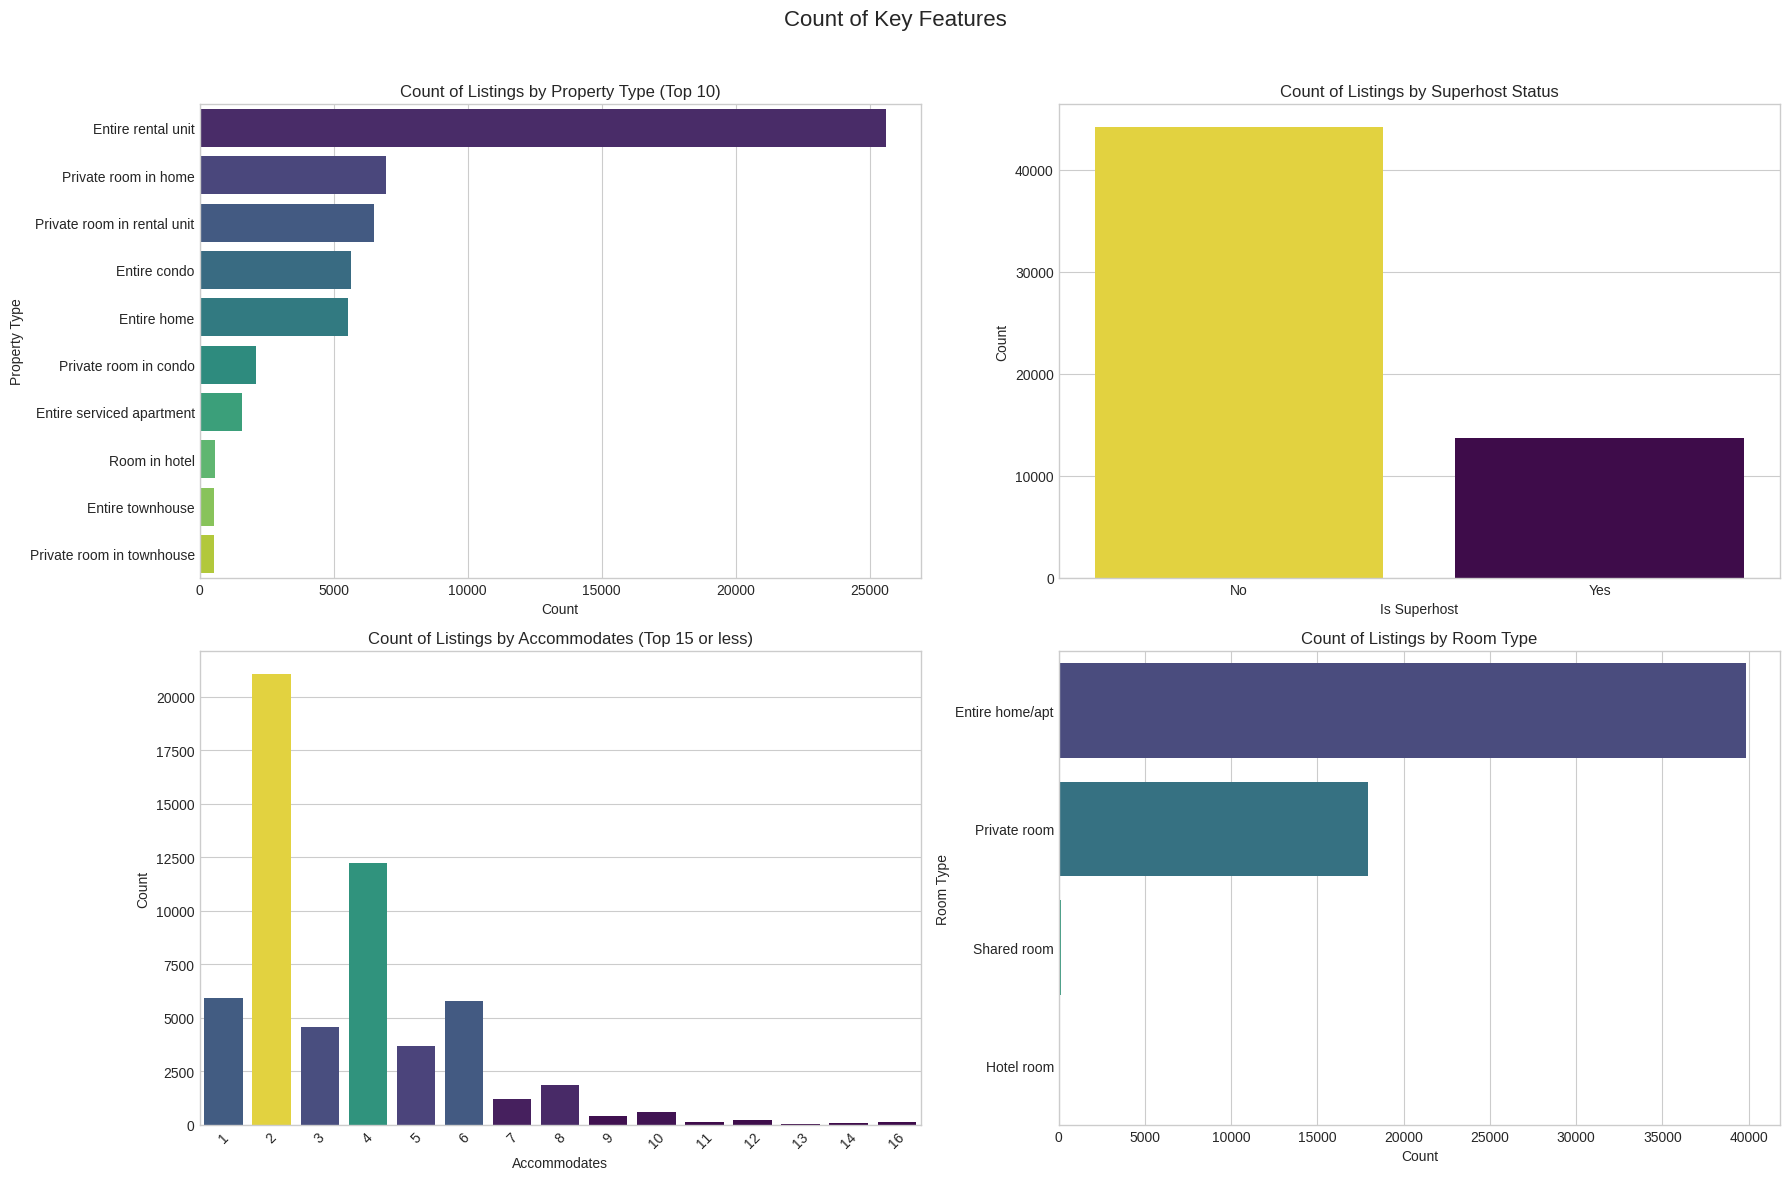

In [83]:
# Set a style for the plots
plt.style.use('seaborn-v0_8-whitegrid')

# Create a figure and a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Count of Key Features', fontsize=16)

# Plot 1: Property Type (Top 10)
property_type_counts = airbnb_data_cleaned['property_type'].value_counts().nlargest(10)
sns.barplot(x=property_type_counts.values, y=property_type_counts.index, ax=axes[0, 0], palette='viridis',
            hue=property_type_counts.index, legend=False)
axes[0, 0].set_title('Count of Listings by Property Type (Top 10)')
axes[0, 0].set_xlabel('Count')
axes[0, 0].set_ylabel('Property Type')

# Plot 2: Host is Superhost (Binary/Categorical)
superhost_counts = airbnb_data_cleaned['host_is_superhost'].value_counts()
sns.barplot(x=superhost_counts.index, y=superhost_counts.values, ax=axes[0, 1], palette='viridis',
            hue=superhost_counts.values, legend=False)
axes[0, 1].set_title('Count of Listings by Superhost Status')
axes[0, 1].set_xlabel('Is Superhost')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_xticks([0, 1])
axes[0, 1].set_xticklabels(['No', 'Yes'])

# Plot 3: Accommodates Count (Numerical)
accommodates_counts = airbnb_data_cleaned['accommodates'].value_counts().sort_index()
# Limit to a reasonable number of accommodates for clarity if there are many unique values
if len(accommodates_counts) > 15:
    accommodates_counts = accommodates_counts.nlargest(15)
sns.barplot(x=accommodates_counts.index, y=accommodates_counts.values, ax=axes[1, 0], palette='viridis',
            hue=accommodates_counts.values, legend=False)
axes[1, 0].set_title('Count of Listings by Accommodates (Top 15 or less)')
axes[1, 0].set_xlabel('Accommodates')
axes[1, 0].set_ylabel('Count')
axes[1, 0].tick_params(axis='x', rotation=45) # Rotate labels if they overlap

# Plot 4: Room Type (Categorical)
room_type_counts = airbnb_data_cleaned['room_type'].value_counts()
sns.barplot(x=room_type_counts.values, y=room_type_counts.index, ax=axes[1, 1], palette='viridis',
            hue=room_type_counts.index, legend=False)
axes[1, 1].set_title('Count of Listings by Room Type')
axes[1, 1].set_xlabel('Count')
axes[1, 1].set_ylabel('Room Type')


plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust layout to prevent title overlap
plt.show()

**Analysis of Listing Characteristics:**

Based on the visualizations of key listing attributes:

*   **Property Types:** The dataset reveals that "Entire rental units" are the most common type of property available, followed by various forms of "Private rooms" and "Entire homes" or "condos". This indicates a strong market presence for both complete dwelling rentals and private room options.
*   **Superhost Status:** The data shows that a significant majority of hosts are not designated as "Superhosts". This highlights an opportunity to potentially analyze the characteristics or performance differences between Superhosts and regular hosts.
*   **Accommodates:** The data suggests that hosts are more favourable to small group of people under 5 which make up a huge majority of the listings.
*   **Room Types:** "Entire home/apt" is the dominant room type, considerably more frequent than "Private room", "Shared room", or "Hotel room". This signifies that guests are most commonly booking entire spaces rather than just rooms within a property.

## Bivariate Analysis

**Which are unqiue property types, room types and neighbourhoods with the highest average prices and earn the highest revenue?**

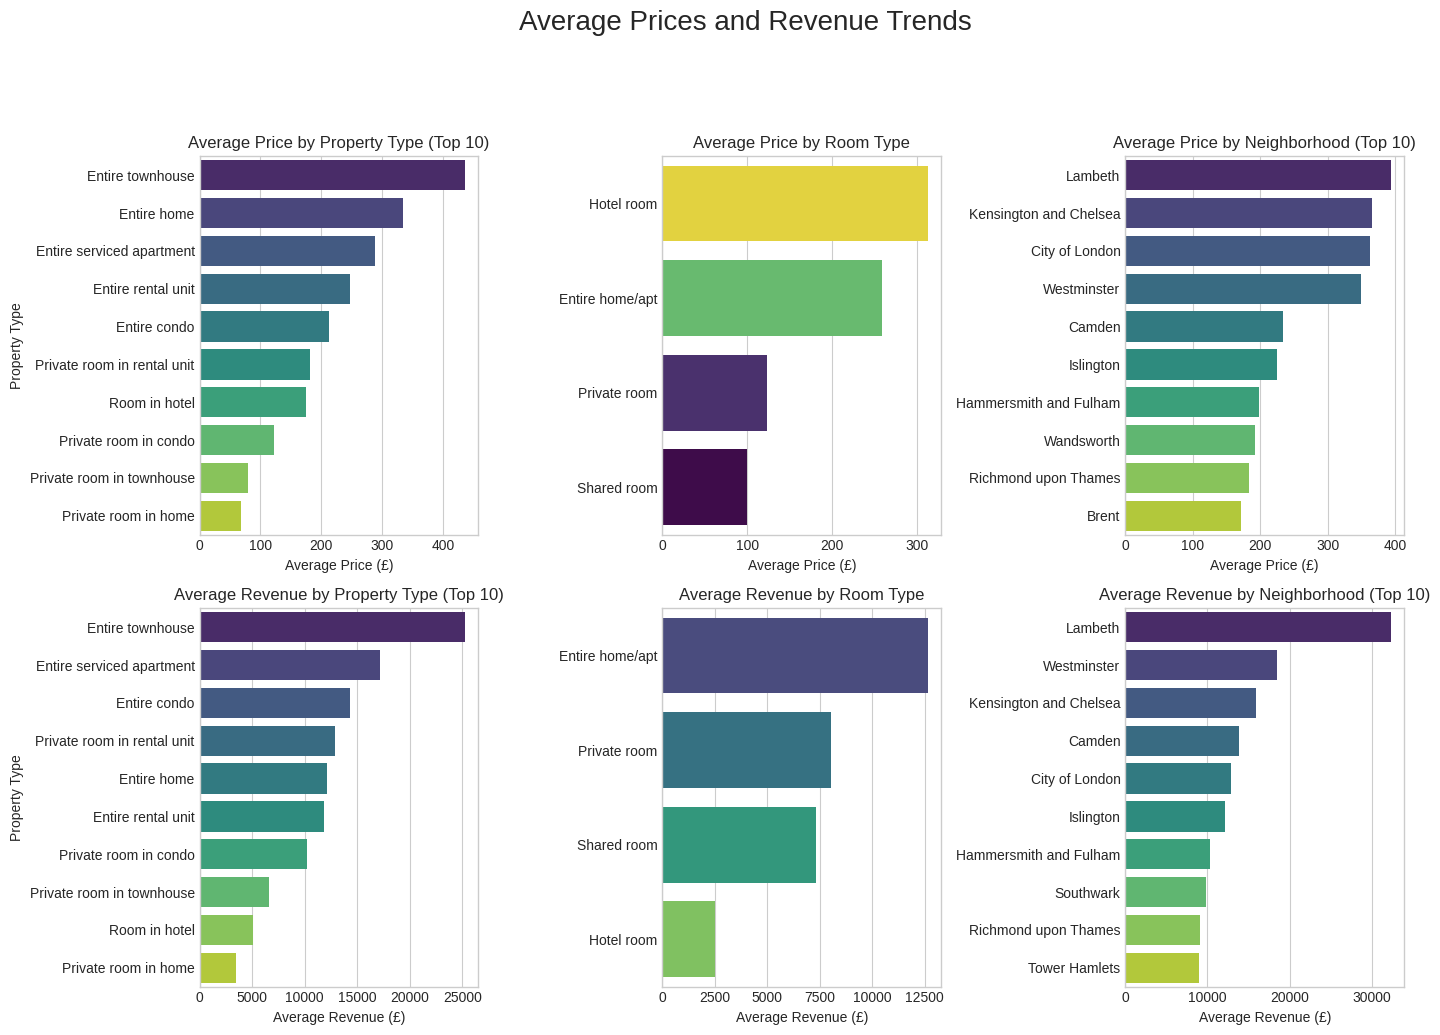

In [84]:

# --- Data Preparation for Plots (This section is unchanged as it uses pandas) ---
# Get the top 10 popular property types
top_10_property_types = airbnb_data_cleaned['property_type'].value_counts().nlargest(10).index

# Filter the dataframe to include only the top 10 property types
filtered_df = airbnb_data_cleaned[airbnb_data_cleaned['property_type'].isin(top_10_property_types)]

# Calculate average price and revenue by property type and sort for price plot
avg_price_by_property_type = filtered_df.groupby('property_type').agg(
    avg_price=('price', 'mean'),
    avg_revenue=('estimated_revenue_l365d', 'mean')
).reset_index().sort_values('avg_price', ascending=False)

# Calculate average price and revenue by property type and sort for revenue plot
avg_revenue_by_property_type = filtered_df.groupby('property_type').agg(
    avg_price=('price', 'mean'),
    avg_revenue=('estimated_revenue_l365d', 'mean')
).reset_index().sort_values('avg_revenue', ascending=False)

# Calculate average price and revenue by room type and sort for price plot
avg_price_by_room_type = airbnb_data_cleaned.groupby('room_type').agg(
    avg_price=('price', 'mean'),
    avg_revenue=('estimated_revenue_l365d', 'mean')
).reset_index().sort_values('avg_price', ascending=False)

# Calculate average price and revenue by room type and sort for revenue plot
avg_revenue_by_room_type = airbnb_data_cleaned.groupby('room_type').agg(
    avg_price=('price', 'mean'),
    avg_revenue=('estimated_revenue_l365d', 'mean')
).reset_index().sort_values('avg_revenue', ascending=False)

# Calculate average price and revenue by neighborhood and sort for price plot
top_10_avg_price_by_neighborhood = airbnb_data_cleaned.groupby('neighbourhood_cleansed').agg(
    avg_price=('price', 'mean'),
    avg_revenue=('estimated_revenue_l365d', 'mean')
).nlargest(10, 'avg_price').reset_index().sort_values('avg_price', ascending=False)

# Calculate average price and revenue by neighborhood and sort for revenue plot
top_10_avg_revenue_by_neighborhood = airbnb_data_cleaned.groupby('neighbourhood_cleansed').agg(
    avg_price=('price', 'mean'),
    avg_revenue=('estimated_revenue_l365d', 'mean')
).nlargest(10, 'avg_revenue').reset_index().sort_values('avg_revenue', ascending=False)


# --- Create Subplots using Matplotlib/Seaborn ---
# Set the style
plt.style.use('seaborn-v0_8-whitegrid')

# Create a 2x3 grid of subplots. figsize is in inches (width, height).
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Set the main title for the entire figure
fig.suptitle("Average Prices and Revenue Trends", fontsize=20, y=1.03)


# --- Row 1: Average Price Plots ---
# Plot 1: Property Type
sns.barplot(ax=axes[0, 0], x='avg_price', y='property_type', data=avg_price_by_property_type, palette='viridis',
            hue='property_type', legend=False)
axes[0, 0].set_title('Average Price by Property Type (Top 10)')
axes[0, 0].set_xlabel('Average Price (£)')
axes[0, 0].set_ylabel('Property Type')


# Plot 2: Room Type
sns.barplot(ax=axes[0, 1], x='avg_price', y='room_type', data=avg_price_by_room_type, palette='viridis',
            hue='avg_price', legend=False)
axes[0, 1].set_title('Average Price by Room Type')
axes[0, 1].set_xlabel('Average Price (£)')
axes[0, 1].set_ylabel('') # Remove y-label to avoid repetition

# Plot 3: Neighborhood
sns.barplot(ax=axes[0, 2], x='avg_price', y='neighbourhood_cleansed', data=top_10_avg_price_by_neighborhood, palette='viridis',
            hue='neighbourhood_cleansed', legend=False)
axes[0, 2].set_title('Average Price by Neighborhood (Top 10)')
axes[0, 2].set_xlabel('Average Price (£)')
axes[0, 2].set_ylabel('') # Remove y-label to avoid repetition


# --- Row 2: Average Revenue Plots ---
# Plot 4: Property Type
sns.barplot(ax=axes[1, 0], x='avg_revenue', y='property_type', data=avg_revenue_by_property_type, palette='viridis',
            hue='property_type', legend=False)
axes[1, 0].set_title('Average Revenue by Property Type (Top 10)')
axes[1, 0].set_xlabel('Average Revenue (£)')
axes[1, 0].set_ylabel('Property Type')

# Plot 5: Room Type
sns.barplot(ax=axes[1, 1], x='avg_revenue', y='room_type', data=avg_revenue_by_room_type, palette='viridis',
            hue='room_type', legend=False)
axes[1, 1].set_title('Average Revenue by Room Type')
axes[1, 1].set_xlabel('Average Revenue (£)')
axes[1, 1].set_ylabel('') # Remove y-label to avoid repetition

# Plot 6: Neighborhood
sns.barplot(ax=axes[1, 2], x='avg_revenue', y='neighbourhood_cleansed', data=top_10_avg_revenue_by_neighborhood, palette='viridis',
            hue='neighbourhood_cleansed', legend=False)
axes[1, 2].set_title('Average Revenue by Neighborhood (Top 10)')
axes[1, 2].set_xlabel('Average Revenue (£)')
axes[1, 2].set_ylabel('') # Remove y-label to avoid repetition


# --- Adjust layout and show the plot ---
plt.tight_layout(rect=[0, 0, 0.95, 0.96]) # Adjust rect to make room for suptitle and legend
plt.show()

**Average Price Insights by Property and Room Type:**

Based on the analysis of average prices and average revenue:
- **Property Type**: The "Entire townhouse" and "Entire serviced apartment" property types command the highest average prices and generate the most revenue, highlighting their market value and popularity.

- **Room Type**: Not surprisingly, the "Entire home/apartment" room type is the most profitable. It has the second highest average price and generates significantly more revenue than "Private room" or "Shared room" listings.
In spite of having the highest price range, hotel rooms ends up in a low income end of the spectrum.  

- **Neighborhoods**: The Lambeth, Kensington, and Chelsea neighborhoods stand out as having the highest average prices and generating the most revenue. This suggests they are premium locations in the market.

In summary, the data indicates that larger, private spaces in key neighborhoods are the most valuable and profitable assets on the platform. This information can be used to advise hosts on maximizing their income or to identify opportunities for new listings in high-demand areas.: The "Entire townhouse" and "Entire serviced apartment" property types command the highest average prices and generate the most revenue, highlighting their market value and popularity.

## **Does host verification status and superhost status have an impact on price and revenue?**

/tmp/ipython-input-3322394750.py:39: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-3322394750.py:46: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-3322394750.py:53: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-3322394750.py:60: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




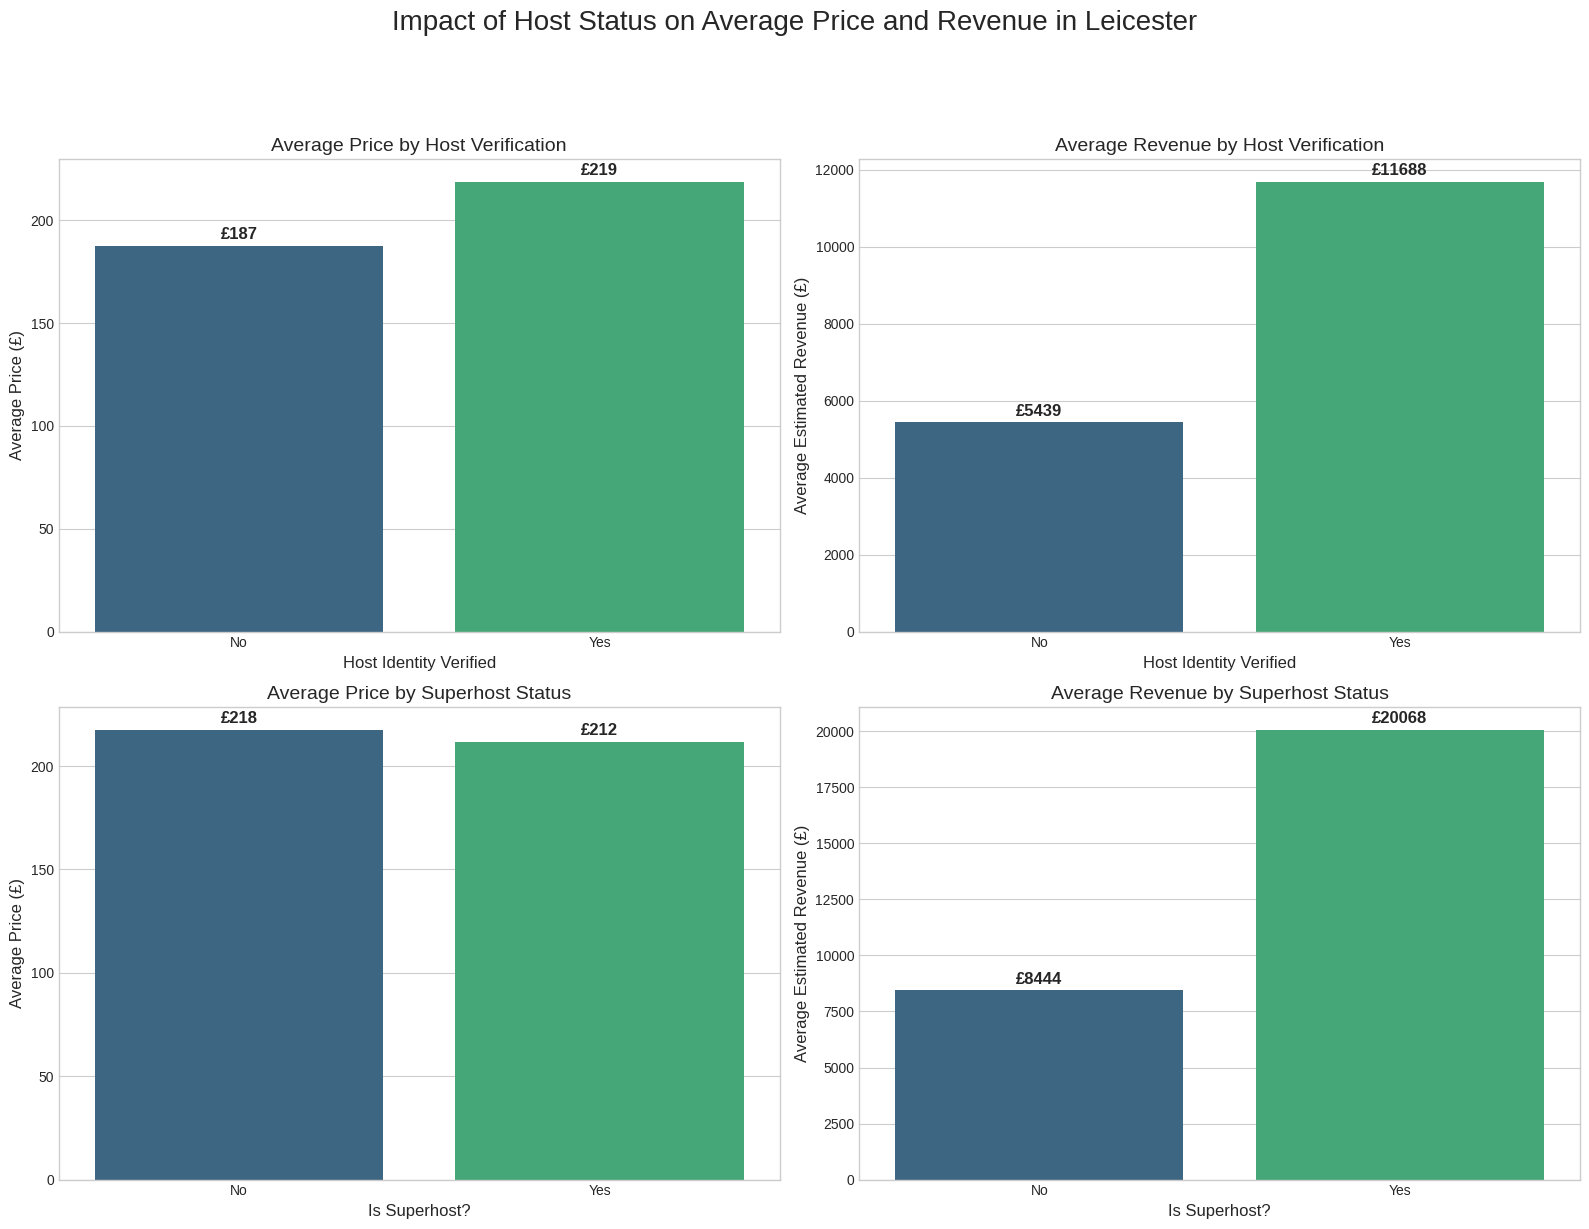

In [78]:

# Set a style for the plots
plt.style.use('seaborn-v0_8-whitegrid')

# --- Data Preparation for Plots ---

# Map boolean/string values to more readable labels for plotting
airbnb_data_cleaned['verification_status'] = airbnb_data_cleaned['host_identity_verified'].map({1: 'Yes', 0: 'No'})
airbnb_data_cleaned['superhost_status'] = airbnb_data_cleaned['host_is_superhost'].map({1: 'Yes', 0: 'No'})

# Group by host_identity_verified status
avg_metrics_by_verification = airbnb_data_cleaned.groupby('verification_status').agg(
    avg_price=('price', 'mean'),
    avg_revenue=('estimated_revenue_l365d', 'mean')
).reset_index()

# Group by host_is_superhost status
avg_metrics_by_superhost = airbnb_data_cleaned.groupby('superhost_status').agg(
    avg_price=('price', 'mean'),
    avg_revenue=('estimated_revenue_l365d', 'mean')
).reset_index()

# Helper function to add data labels on top of bars
def add_labels(ax, currency_symbol='£'):
    """Adds formatted data labels to a bar chart axis."""
    for bar in ax.patches:
        ax.annotate(f'{currency_symbol}{bar.get_height():.0f}',  # Format the label
                    (bar.get_x() + bar.get_width() / 2, bar.get_height()),  # Position
                    ha='center', va='center',
                    size=12,
                    xytext=(0, 8),
                    textcoords='offset points',
                    weight='bold')

# --- Create Subplots ---
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle("Impact of Host Status on Average Price and Revenue in Leicester", fontsize=20, y=1.02)

# --- Row 1, Column 1: Price by Verification Status ---
sns.barplot(ax=axes[0, 0], x='verification_status', y='avg_price', data=avg_metrics_by_verification, palette='viridis', order=['No', 'Yes'])
axes[0, 0].set_title('Average Price by Host Verification', fontsize=14)
axes[0, 0].set_xlabel('Host Identity Verified', fontsize=12)
axes[0, 0].set_ylabel('Average Price (£)', fontsize=12)
add_labels(axes[0, 0], currency_symbol='£')

# --- Row 1, Column 2: Revenue by Verification Status ---
sns.barplot(ax=axes[0, 1], x='verification_status', y='avg_revenue', data=avg_metrics_by_verification, palette='viridis', order=['No', 'Yes'])
axes[0, 1].set_title('Average Revenue by Host Verification', fontsize=14)
axes[0, 1].set_xlabel('Host Identity Verified', fontsize=12)
axes[0, 1].set_ylabel('Average Estimated Revenue (£)', fontsize=12)
add_labels(axes[0, 1], currency_symbol='£')

# --- Row 2, Column 1: Price by Superhost Status ---
sns.barplot(ax=axes[1, 0], x='superhost_status', y='avg_price', data=avg_metrics_by_superhost, palette='viridis', order=['No', 'Yes'])
axes[1, 0].set_title('Average Price by Superhost Status', fontsize=14)
axes[1, 0].set_xlabel('Is Superhost?', fontsize=12)
axes[1, 0].set_ylabel('Average Price (£)', fontsize=12)
add_labels(axes[1, 0], currency_symbol='£')

# --- Row 2, Column 2: Revenue by Superhost Status ---
sns.barplot(ax=axes[1, 1], x='superhost_status', y='avg_revenue', data=avg_metrics_by_superhost, palette='viridis', order=['No', 'Yes'])
axes[1, 1].set_title('Average Revenue by Superhost Status', fontsize=14)
axes[1, 1].set_xlabel('Is Superhost?', fontsize=12)
axes[1, 1].set_ylabel('Average Estimated Revenue (£)', fontsize=12)
add_labels(axes[1, 1], currency_symbol='£')

# --- Adjust layout and show the plot ---
plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust rect to make room for suptitle
plt.show()

**Interpretation of the Impact of Host Status on Average Price and Revenue:**

Based on the bar charts:

*   **Host Verification Status:** Listings from hosts with verified identity ('Yes') generally have a higher average price and significantly higher average estimated revenue compared to listings from hosts with unverified identity ('No'). This suggests that guests might be willing to pay more or that verified hosts are more likely to have properties that generate higher revenue.
*   **Superhost Status:** Interestingly, Superhosts ('Yes') have a slightly lower average price than non-Superhosts ('No'). However, Superhosts generate a substantially higher average estimated revenue. This indicates that while Superhosts might not necessarily charge the highest prices per night, their ability to attract more bookings and maintain higher occupancy rates (implied by higher revenue despite similar or slightly lower prices) makes them more successful in terms of overall earnings. This aligns with the idea that Superhost status is associated with better performance and guest satisfaction, leading to more consistent bookings.

In summary, both host verification and Superhost status appear to have a positive impact on a host's success on the platform, particularly in terms of estimated revenue. While verified hosts tend to have higher average prices and revenue, Superhosts, despite potentially lower average prices, demonstrate significantly higher revenue generation, likely due to higher occupancy and booking rates.

# Price vs Host Characteristics
**How does host characteristics affect price?**

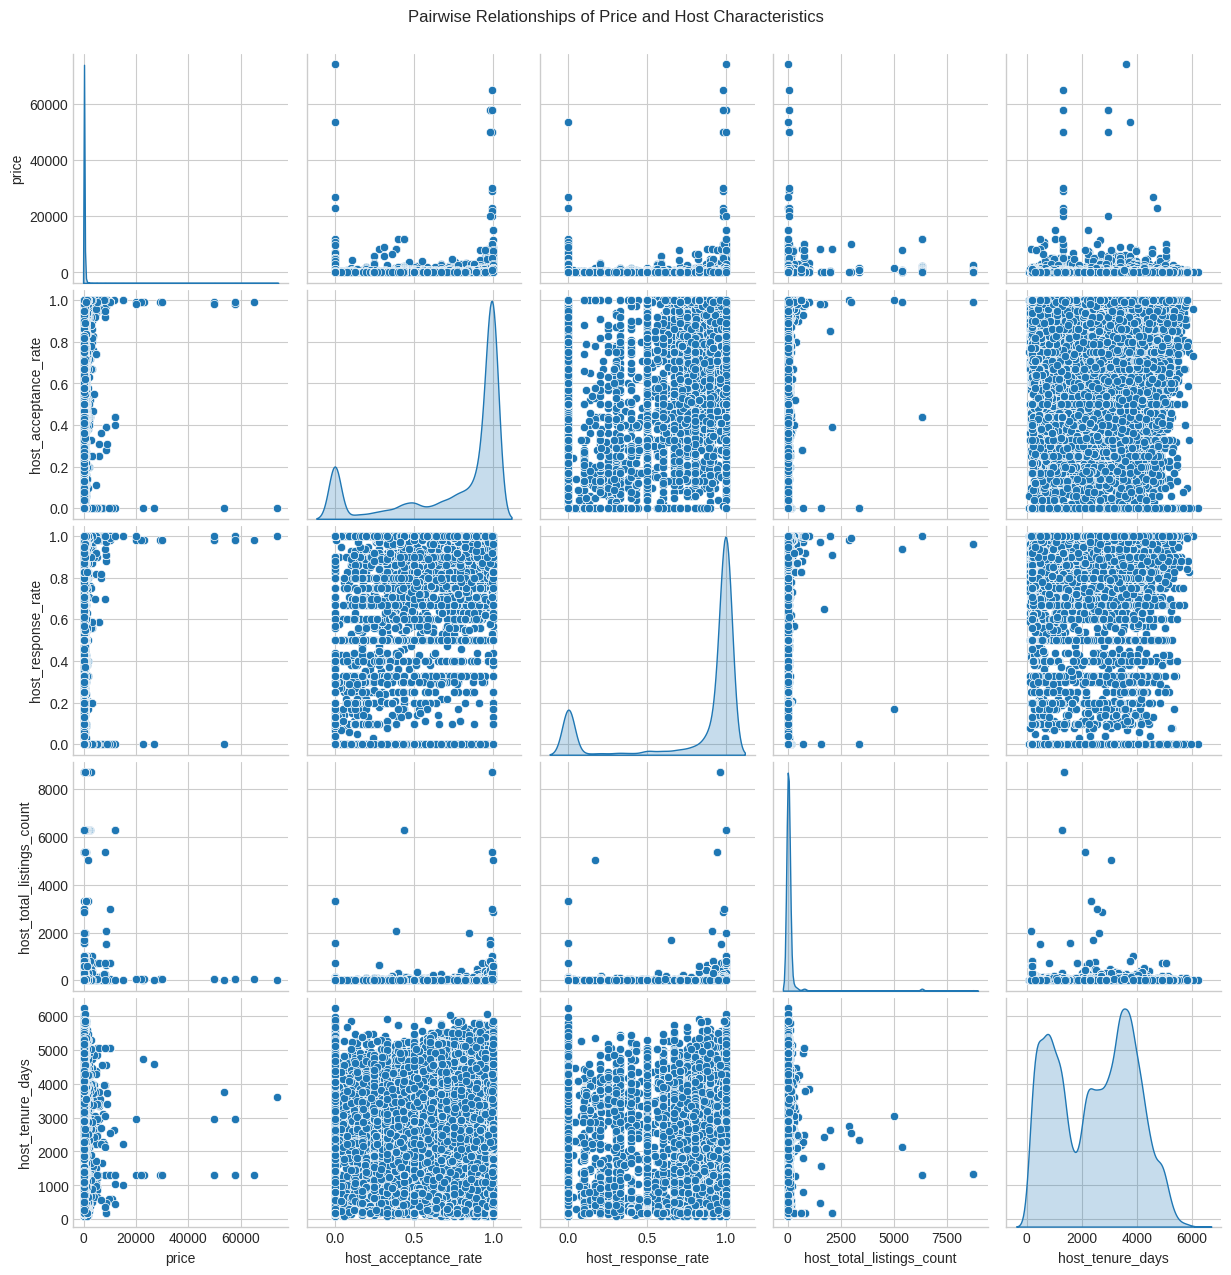

<Figure size 1000x800 with 0 Axes>

In [13]:
# Visualise relationship between price and key host characteristics
host_columns = ['host_acceptance_rate', 'host_response_rate', 'host_total_listings_count', 'host_tenure_days']

sns.pairplot(airbnb_data_cleaned[['price'] + host_columns], diag_kind='kde')
plt.suptitle('Pairwise Relationships of Price and Host Characteristics', y=1.02)
plt.figure(figsize=(10,8))
plt.show()

**Interpretation of Price vs. Host Characteristics Pairwise Relationships:**

Based on the pairwise plot:

*   **Price vs. Host Acceptance Rate:** The scatter plot shows that many listings with high host acceptance rates are in the lower price ranges, and there's a wide spread across different acceptance rates for various prices. A clear linear relationship between price and host acceptance rate is not immediately apparent across the entire dataset.
*   **Price vs. Host Response Rate:** Similar to host acceptance rate, a strong linear relationship between price and host response rate is not immediately apparent. Many listings with high response rates are in the lower price ranges, and there's a spread across different response rates for various prices.
*   **Price vs. Host Total Listings Count:** The scatter plot shows that most listings, especially those at lower prices, are from hosts with a relatively low number of total listings. There are some hosts with a very high number of listings, and these listings cover a wide range of prices, including some of the higher-priced ones. This suggests that hosts with more listings might have a broader pricing strategy or offer a variety of property types at different price points.
*   **Price vs. Host Tenure Days:** The scatter plot shows a wide spread of prices across different host tenure durations. While there might be some listings with higher prices associated with longer host tenure, there is no strong linear trend, and many listings at various tenure lengths are in the lower price ranges.

Overall, these plots suggest that while there might be some subtle trends, host acceptance rate, response rate, and host tenure days do not have a dominant, clear linear relationship with price across the entire dataset. The number of total listings might show some association, with hosts managing more properties having listings across a wider price spectrum.

## Price vs Review Characteristics
**Does customer reviews have any impact on price of listings?**

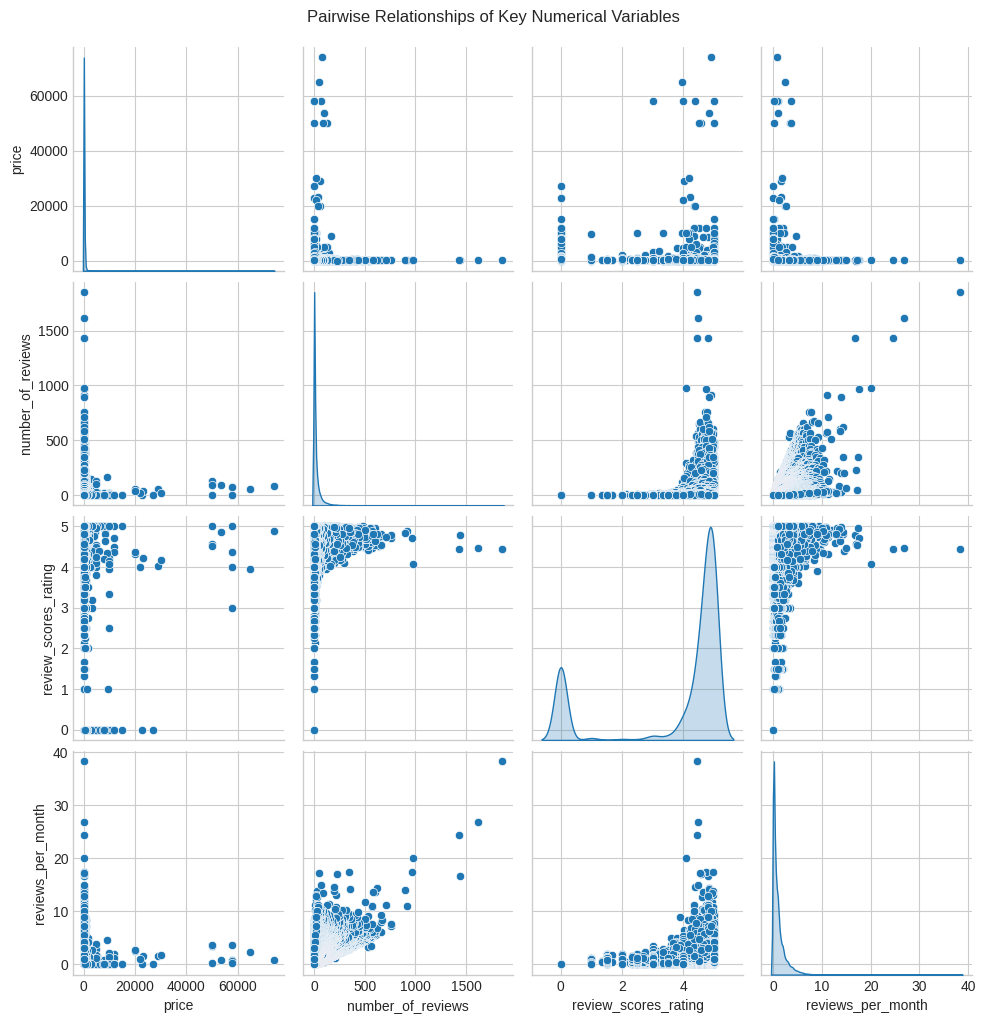

In [14]:
# Visualize relationships between price and key review characteristics
review_cols = ['number_of_reviews', 'review_scores_rating', 'reviews_per_month',
                           ]
sns.pairplot(airbnb_data_cleaned[['price'] + review_cols], diag_kind='kde')
plt.suptitle('Pairwise Relationships of Key Numerical Variables', y=1.02)
plt.show()

**Detailed Interpretation: Price vs. Review Characteristics**

Expanding on the previous analysis, let's look closer at the relationship between `price` and the review-related variables:

*   **Price vs. Number of Reviews:** No strong linear correlation. High number of reviews doesn't guarantee high price; other factors are more influential.
*   **Price vs. Review Scores Rating:** No strong linear pattern. Many listings across various price points have high scores. High rating alone doesn't seem to be the primary driver of a high price.
*   **Price vs. Reviews per Month:** No strong linear relationship. Higher rate of reviews per month doesn't directly dictate a high price.

In summary, while review characteristics are important indicators, they do not appear to have a dominant, direct linear relationship with price. Price is likely influenced by a combination of factors including location, property type, size, amenities, and market demand, in addition to review performance.

## Price vs Facilities
**What is the relationship between an accomodation's facilities and it's price?**

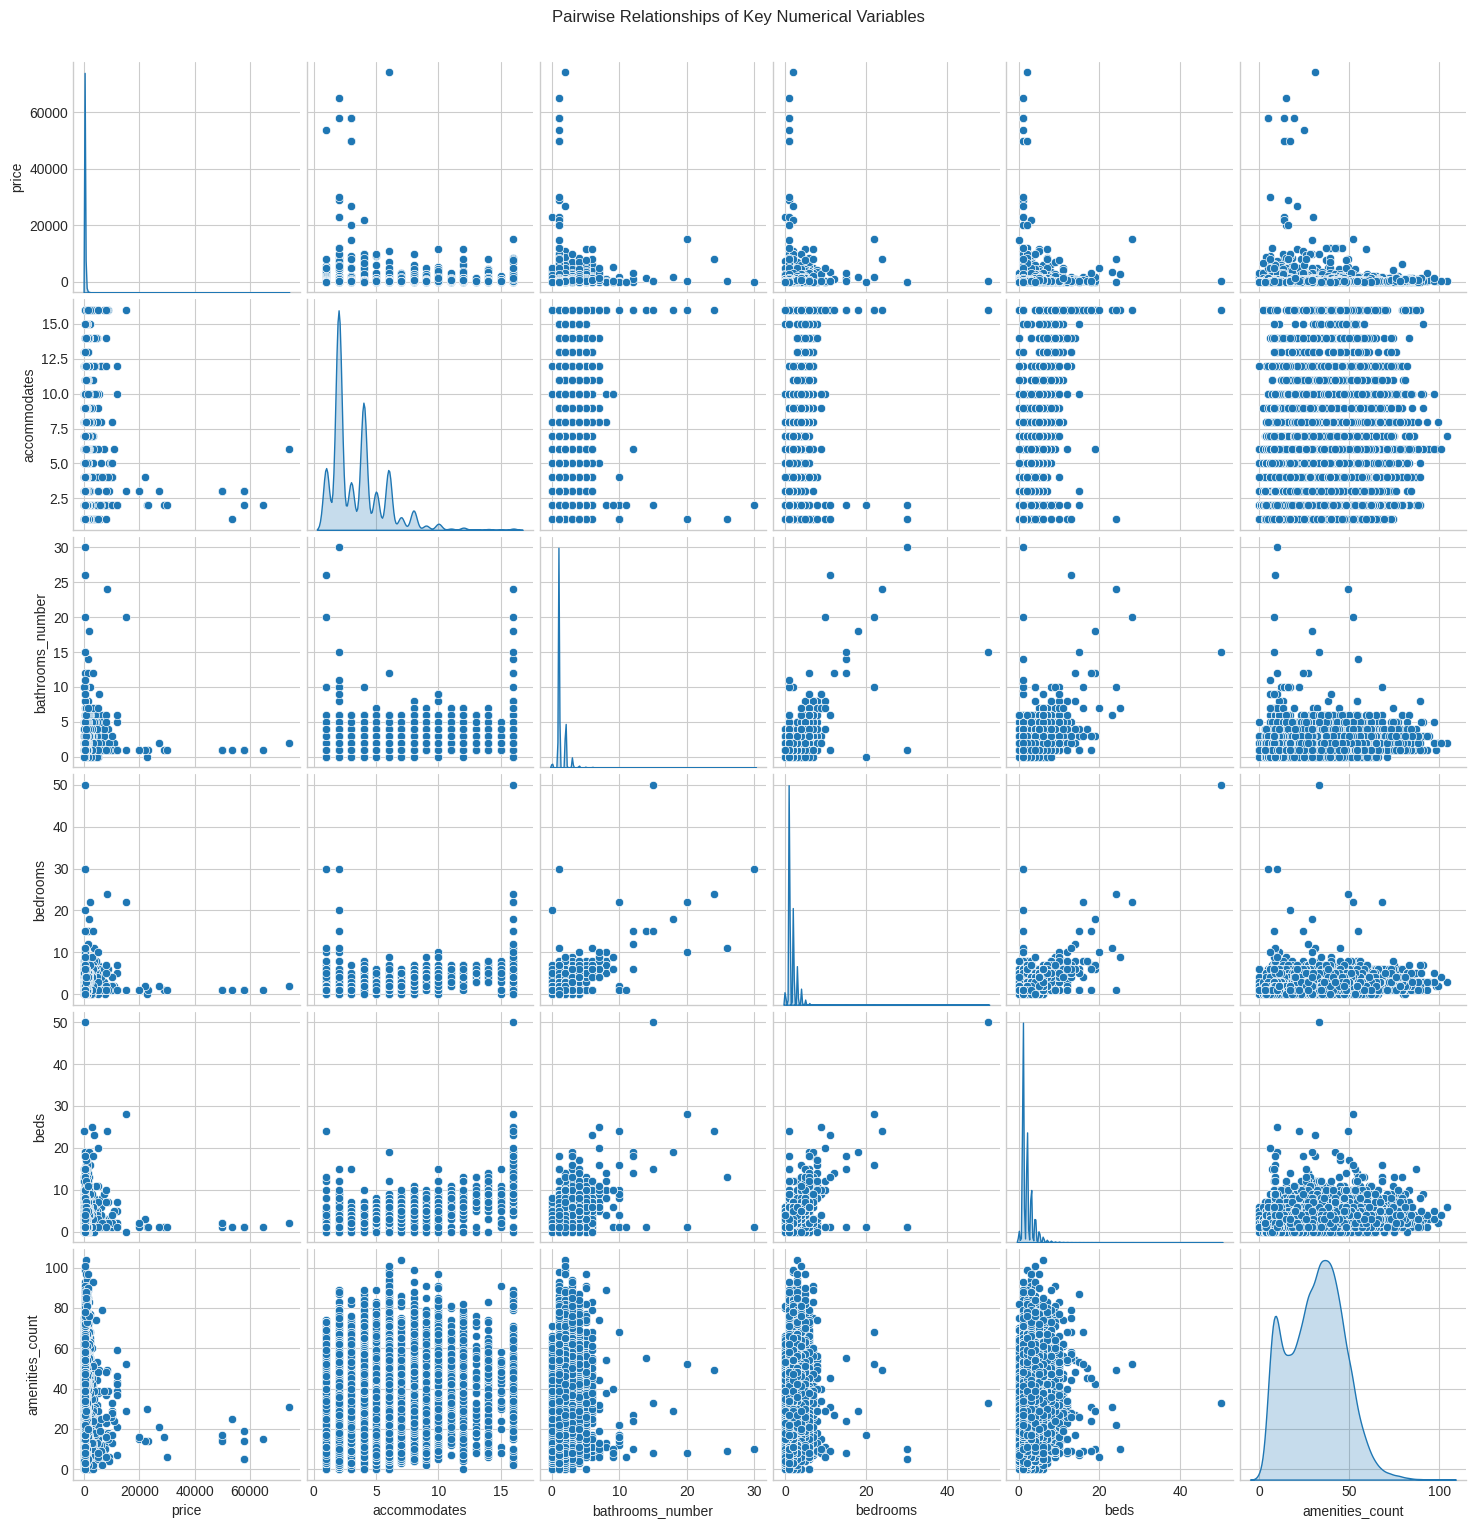

In [15]:
# Visualise relationship between price and key facilities
facilities_cols = ['accommodates', 'bathrooms_number', 'bedrooms', 'beds', 'amenities_count']

sns.pairplot(airbnb_data_cleaned[['price'] + facilities_cols], diag_kind='kde')
plt.suptitle('Pairwise Relationships of Key Numerical Variables', y=1.02)
plt.show()

**Interpretation of Price vs. Facilities Pairwise Relationships:**

Based on the pairwise plot:

*   **Price vs. Accommodates:** There appears to be a general trend where listings that accommodate more people tend to have higher prices, although the relationship is not perfectly linear and there is significant spread in prices for any given number of accommodates.
*   **Price vs. Bathrooms Number, Bedrooms, and Beds:** Similar to 'accommodates', there's a tendency for prices to increase as the number of bathrooms, bedrooms, and beds increases. However, there's a wide variation in price for properties with the same number of these facilities. Outliers with very high prices exist across different numbers of bathrooms, bedrooms, and beds.
*   **Price vs. Amenities Count:** The plot shows a wide spread of prices for listings with varying numbers of amenities. While there might be a slight upward trend in price as the number of amenities increases, it's not a strong or consistent relationship across all price ranges. Many listings with a moderate number of amenities are in the lower price ranges.

Overall, the plots suggest that while the number of accommodates, bathrooms, bedrooms, and beds show some positive association with price, the relationship is not strictly linear, and other factors also heavily influence the price. The number of amenities seems to have a weaker relationship with price compared to the size-related features.

##

## Revenue vs Facilities
**What is the relationship between an accommodation's facilities and revenue?**


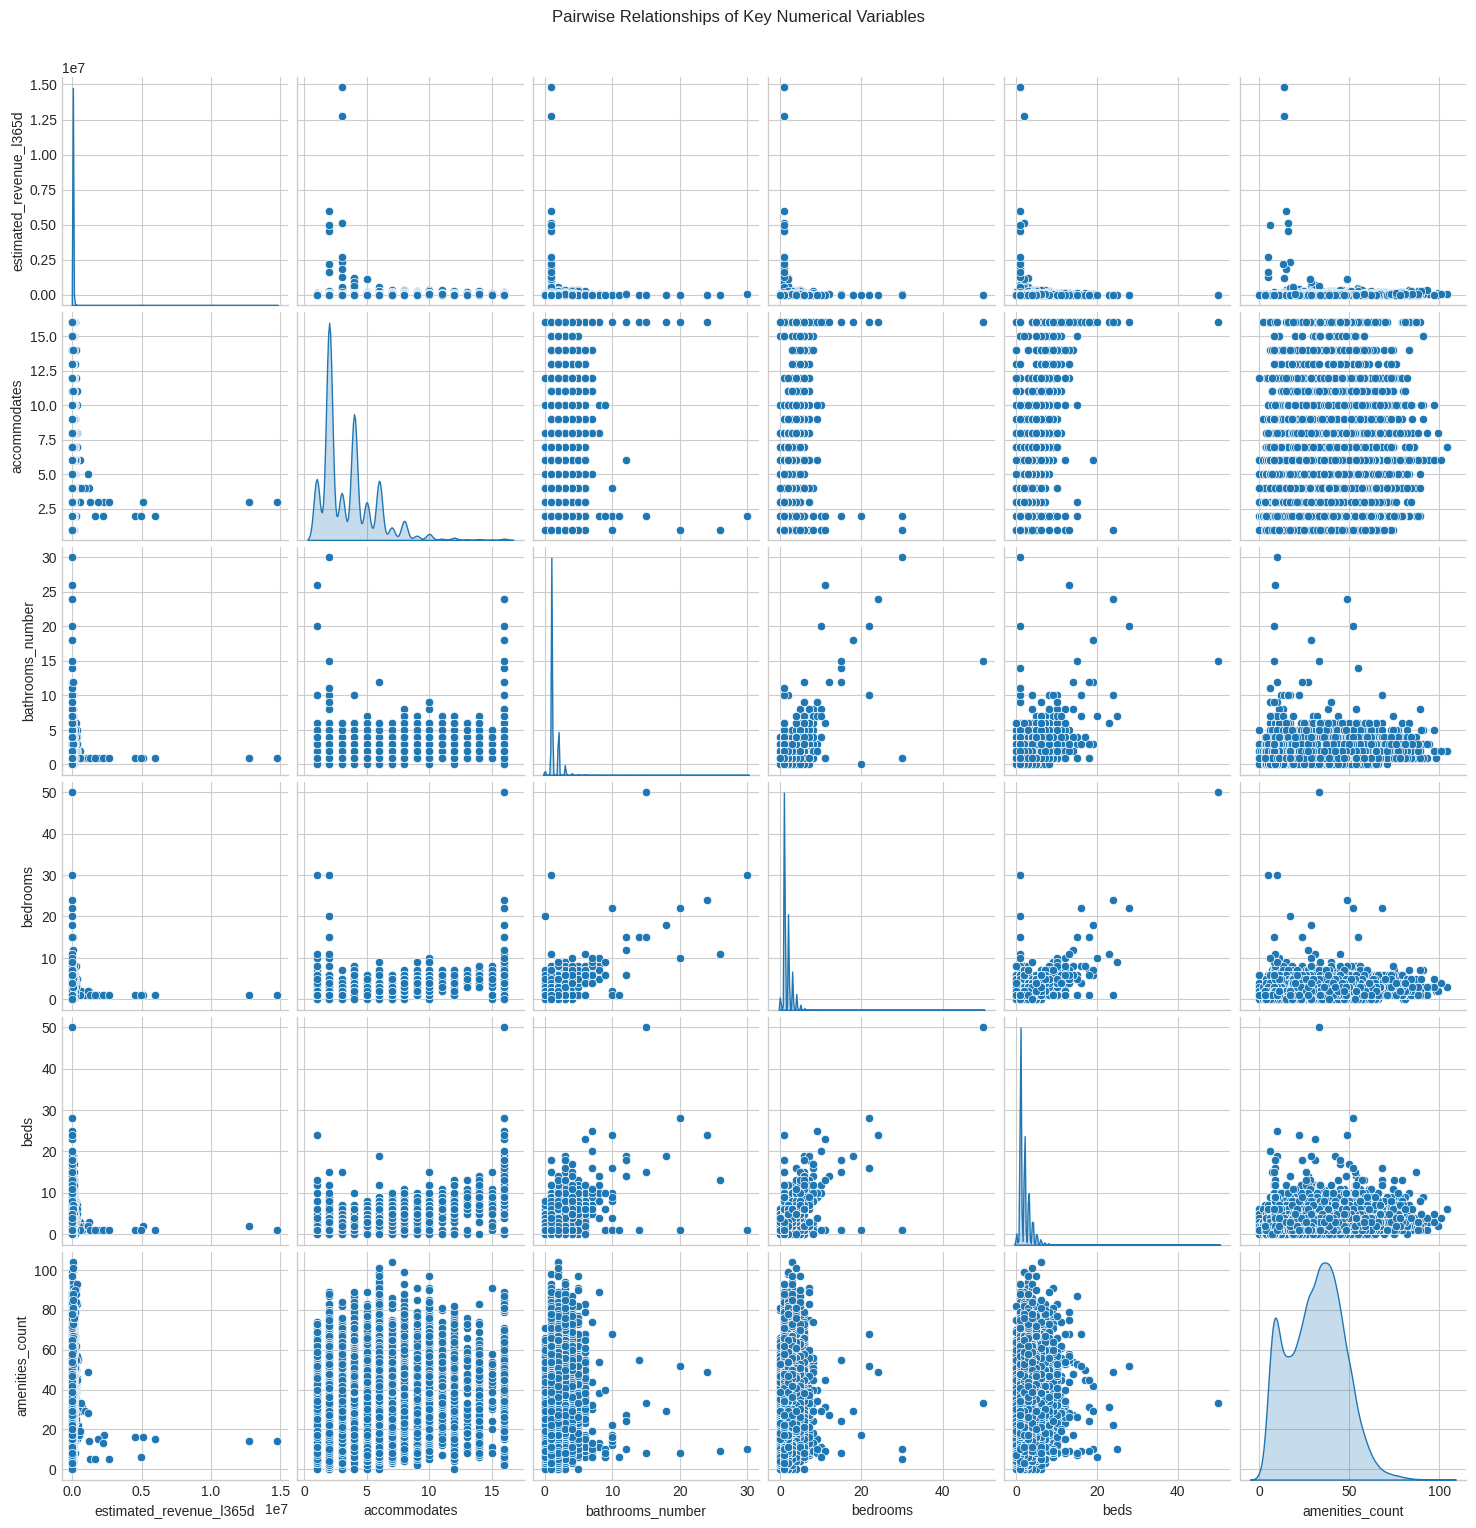

In [16]:
# Visualise relationship between revenue and key facilities
sns.pairplot(airbnb_data_cleaned[['estimated_revenue_l365d'] + facilities_cols], diag_kind='kde')
plt.suptitle('Pairwise Relationships of Key Numerical Variables', y=1.02)
plt.show()

**Interpretation of Revenue vs. Facilities Pairwise Relationships:**

Based on the pairwise plot showing the relationship between estimated revenue and accommodation facilities:

*   **Estimated Revenue vs. Accommodates:** The scatter plot suggests a positive relationship between estimated revenue and the number of people a listing accommodates. Generally, listings that can host more guests tend to generate higher estimated revenue. While there's variability, the upper bound of estimated revenue appears to increase as the number of accommodates rises. This indicates that larger properties or those designed for more guests have a higher earning potential.

*   **Estimated Revenue vs. Bathrooms Number, Bedrooms, and Beds:** Similar positive trends are observed between estimated revenue and the number of bathrooms, bedrooms, and beds. Listings with more bathrooms, bedrooms, and beds tend to have higher estimated revenue. This reinforces the idea that the size and capacity of a property are significant factors influencing its revenue generation. Properties with more facilities to accommodate guests are likely to attract more bookings or command higher prices, leading to increased revenue.

*   **Estimated Revenue vs. Amenities Count:** The scatter plot for estimated revenue and amenities count shows a general upward trend, but with considerable spread. Listings with a higher number of amenities tend to have higher estimated revenue, particularly at the higher end of the revenue spectrum. This suggests that while having more amenities can contribute to higher earnings, it's not a guaranteed factor for all listings, and the specific types and quality of amenities likely also play a role.

In summary, the pairwise plots indicate that accommodation facilities, particularly those related to the size and capacity of the property (`accommodates`, `bathrooms_number`, `bedrooms`, `beds`), show a clear positive relationship with estimated revenue. The number of amenities also appears to contribute positively to revenue, although the relationship might be more complex. These findings highlight that the physical characteristics and offerings of a listing are strong predictors of its potential earnings.

## **Does listings with more reviews tend to earn more revenue?**

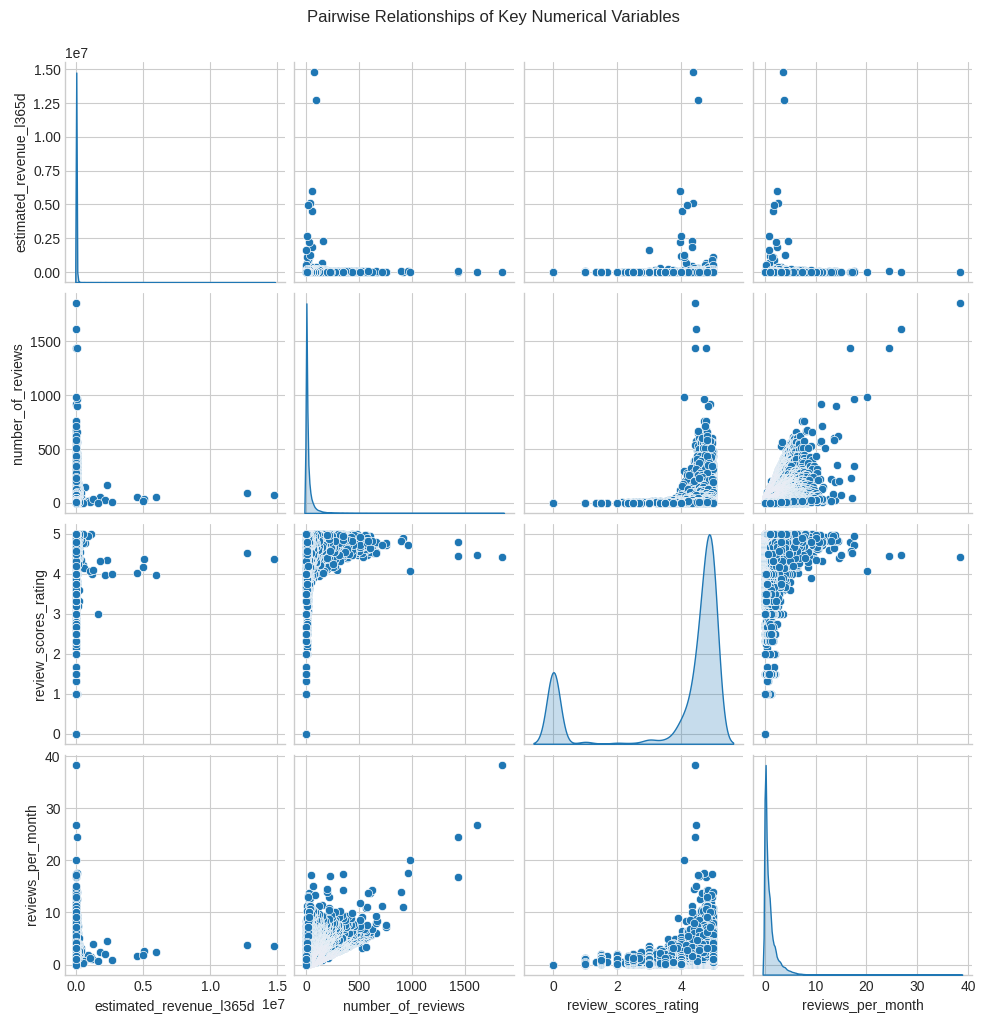

In [17]:
# Visualise relationship between revenue andr reviews
sns.pairplot(airbnb_data_cleaned[['estimated_revenue_l365d'] + review_cols], diag_kind='kde')
plt.suptitle('Pairwise Relationships of Key Numerical Variables', y=1.02)
plt.show()

**Interpretation of Estimated Revenue vs. Review Characteristics:**

Based on the pairwise plot showing the relationship between estimated revenue and review characteristics:

*   **Estimated Revenue vs. Number of Reviews:** The scatter plot shows a positive relationship between estimated revenue and the number of reviews. Listings with a higher number of reviews tend to have higher estimated revenue. This suggests that popular listings with more guest feedback are likely to generate more income.

*   **Estimated Revenue vs. Review Scores Rating:** There appears to be a positive association between estimated revenue and review scores rating, particularly at higher revenue levels. Listings with higher estimated revenue tend to have higher review scores ratings. This indicates that guest satisfaction, as reflected in review scores, is likely linked to higher earning potential.

*   **Estimated Revenue vs. Reviews per Month:** The scatter plot shows a positive relationship between estimated revenue and reviews per month. Listings with a higher rate of reviews per month tend to have higher estimated revenue. This suggests that listings with more frequent bookings and guest activity are likely to generate more income.

In summary, the pairwise plots indicate that there are positive relationships between estimated revenue and review characteristics (`number_of_reviews`, `review_scores_rating`, and `reviews_per_month`). Listings that are more popular, have higher guest satisfaction, and more frequent reviews tend to generate higher estimated revenue. This highlights the importance of positive guest experiences and consistent bookings for maximizing revenue.

## **Can host characteristics impact revenue?**

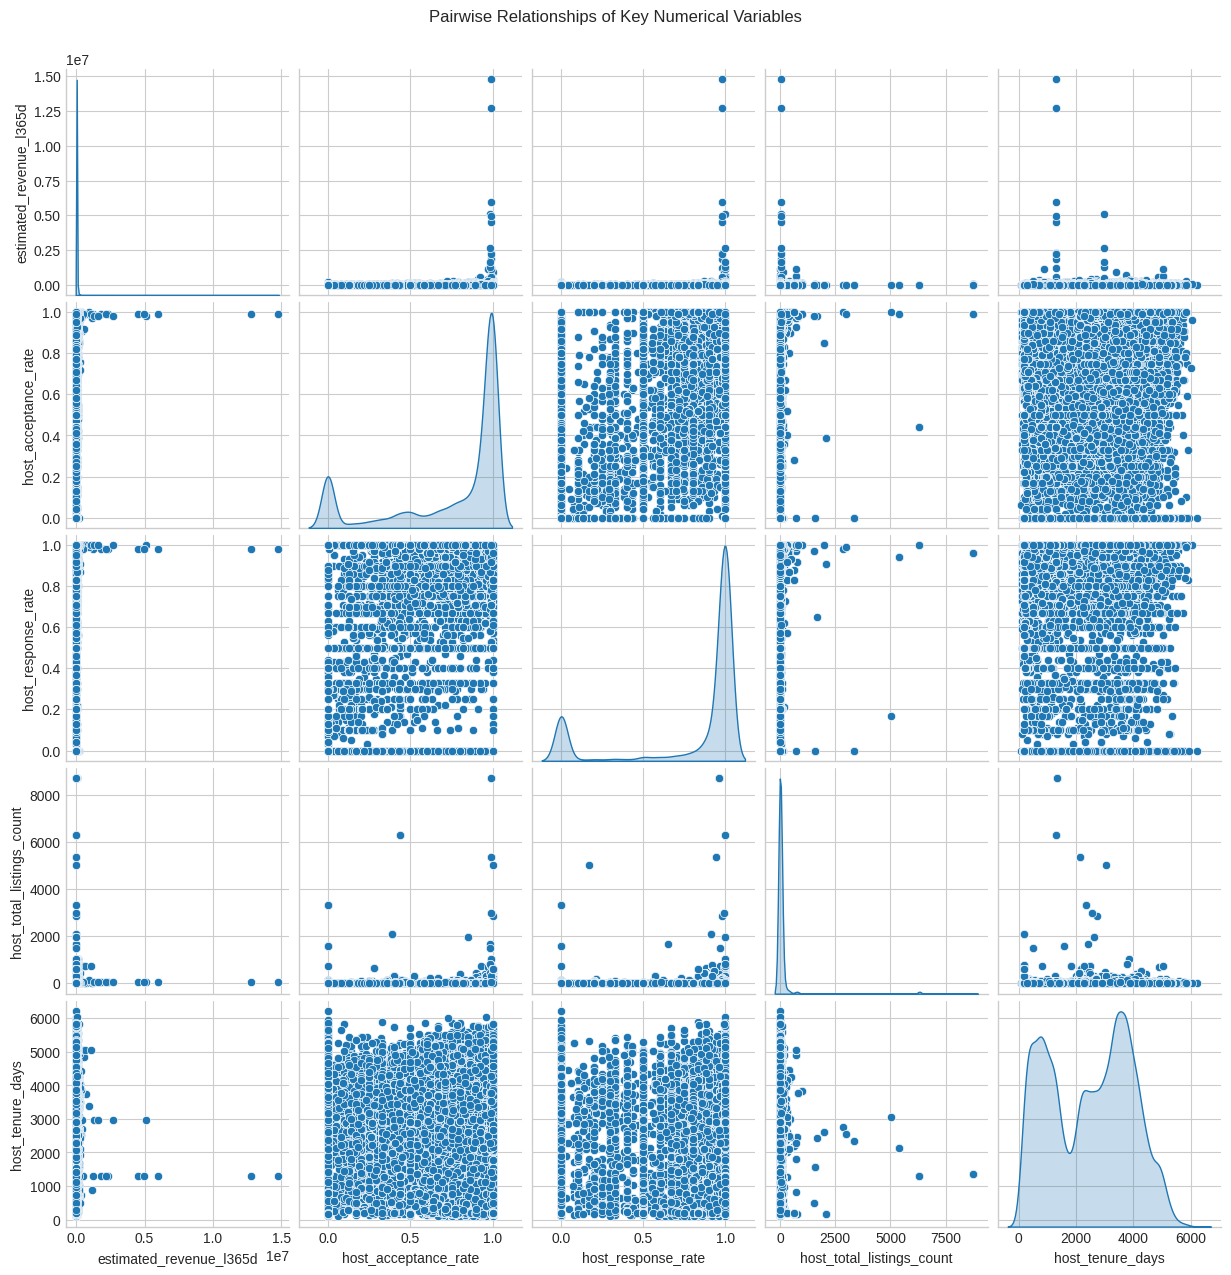

In [18]:
# Visualise relationship between revenue and host characteristics
sns.pairplot(airbnb_data_cleaned[['estimated_revenue_l365d'] + host_columns], diag_kind='kde')
plt.suptitle('Pairwise Relationships of Key Numerical Variables', y=1.02)
plt.show()

**Interpretation of Estimated Revenue vs. Host Characteristics:**

Based on the pairwise plot showing the relationship between estimated revenue and host characteristics:

*   **Estimated Revenue vs. Host Acceptance Rate and Host Response Rate:** The scatter plots show a wide distribution of estimated revenue across different host acceptance and response rates. While there are listings with high estimated revenue at high acceptance and response rates, there isn't a clear linear trend. This suggests that while being responsive and accepting might be beneficial, they are not the sole determinants of high revenue, and other factors play a significant role.

*   **Estimated Revenue vs. Host Total Listings Count:** The scatter plot indicates a positive relationship between estimated revenue and the total number of listings a host has. Hosts with a higher number of listings tend to have listings that generate higher estimated revenue, particularly at the higher end of the revenue spectrum. This could suggest that experienced hosts with multiple properties are more successful in generating revenue, possibly due to economies of scale, better management, or a portfolio of high-performing properties.

*   **Estimated Revenue vs. Host Tenure Days:** The scatter plot shows a wide spread of estimated revenue across different host tenure durations. While there are listings with higher estimated revenue associated with longer host tenure, there is no strong linear trend across all listings. This suggests that while experience on the platform might be beneficial, it doesn't guarantee high revenue, and newer hosts can also have successful listings.

In summary, the pairwise plots suggest that among host characteristics, the total number of listings a host manages appears to have the clearest positive relationship with estimated revenue. Host acceptance rate, response rate, and tenure days show less distinct linear relationships with revenue across the entire dataset, indicating that their impact on revenue might be more complex or indirect.

# Key Insights for Hosts and Next Steps

This analysis explored the Airbnb dataset to uncover factors influencing listing performance, particularly price and estimated revenue. Here are some key takeaways and actionable insights for both upcoming and existing hosts:

**Insights for Upcoming and Existing Hosts:**

*   **Property and Room Type Strategy:** "Entire rental units" and "Entire home/apt" are the most popular listing types. Consider offering these if possible, as they have strong market presence. "Entire townhouses" and "Entire serviced apartments" command the highest average prices and revenue – explore these if you have access to such properties.
*   **Targeting Guest Capacity:** The market has a high demand for listings accommodating 1-4 guests. Ensure your property is optimized for a specific guest capacity, and consider if catering to slightly larger groups aligns with your property and goals, as capacity correlates with higher revenue.
*   **The Superhost Advantage:** While Superhosts might not always charge the highest prices, they earn significantly more revenue on average. Focus on achieving Superhost status by providing excellent guest experiences, which leads to more bookings and higher earnings.
*   **Location, Location, Location:** Listings in Lambeth, Kensington, and Chelsea demonstrate the highest average prices and revenue. If you're an upcoming host, consider these areas. Existing hosts in these areas should leverage their prime location in their listing descriptions.
*   **Verification Builds Trust and Revenue:** Having a verified identity (`host_identity_verified`) is associated with higher average prices and significantly higher revenue. Ensure your host identity is verified to build trust with potential guests.
*   **Facilities Boost Earnings:** The number of accommodates, bathrooms, bedrooms, and beds are positively related to estimated revenue. Investing in or highlighting these facilities can increase earning potential. The number of amenities also contributes, so ensure your listing is well-equipped.
*   **Reviews Drive Revenue:** More reviews, higher ratings, and a higher rate of reviews per month are all linked to higher estimated revenue. Prioritize providing excellent guest experiences to get positive reviews and encourage guests to leave feedback.
*   **Experienced Hosts with More Listings Earn More:** Hosts with a higher total number of listings tend to generate more revenue. This suggests that experience and managing multiple properties can be beneficial.

**Next Steps for Deeper Understanding and Action:**

To further leverage these insights the next phase will involve:

1.  **Detailed Revenue and Price Drivers:** Dive deeper into which specific factors most strongly predict estimated revenue and price.
2. **Investigate superhost_status**: Does listings offered by hosts with superhost status have a statistically significant differences in prices and revenue when compared with hosts with no superhost status?
3.  **Categoricals Deep Dive:** Identify which specific facilities, amenities are most popular or correlated with higher earnings.
4.  **Competitive Analysis:** Compare your listing's features, pricing, and reviews to successful listings in your area.
5.  **Potential for Optimization:** Use these insights to identify areas where you can improve your listing (e.g., adding amenities, optimizing pricing, enhancing guest communication).

You can move on to the next notebook for these steps: [04_data_transformations_and_modelling](data.ipynb)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # Import numpy if needed for aggregations
import pandas as pd # Import pandas

# Set a style for the plots
plt.style.use('seaborn-v0_8-whitegrid')

# --- Data Preparation for Plots ---
# Get the top 10 popular property types
top_10_property_types = airbnb_data_cleaned['property_type'].value_counts().nlargest(10).index

# Filter the dataframe to include only the top 10 property types
filtered_df = airbnb_data_cleaned[airbnb_data_cleaned['property_type'].isin(top_10_property_types)].copy() # Use .copy() to avoid SettingWithCopyWarning

# Calculate average price and revenue by property type and sort
avg_metrics_by_property_type = filtered_df.groupby('property_type').agg(
    avg_price=('price', 'mean'),
    avg_revenue=('estimated_revenue_l365d', 'mean')
).reset_index()

# Calculate average price and revenue by room type and sort
avg_metrics_by_room_type = airbnb_data_cleaned.groupby('room_type').agg(
    avg_price=('price', 'mean'),
    avg_revenue=('estimated_revenue_l365d', 'mean')
).reset_index()

# Calculate average price and revenue by neighborhood and sort for price and revenue plots
# Using .copy() here too
avg_metrics_by_neighborhood = airbnb_data_cleaned.groupby('neighbourhood_cleansed').agg(
    avg_price=('price', 'mean'),
    avg_revenue=('estimated_revenue_l365d', 'mean')
).reset_index()

# Get top 10 neighborhoods by average price and sort for plotting
top_10_avg_price_by_neighborhood = avg_metrics_by_neighborhood.nlargest(10, 'avg_price').sort_values('avg_price', ascending=True)

# Get top 10 neighborhoods by average revenue and sort for plotting
top_10_avg_revenue_by_neighborhood = avg_metrics_by_neighborhood.nlargest(10, 'avg_revenue').sort_values('avg_revenue', ascending=True)


# --- Create Subplots ---
fig, axes = plt.subplots(2, 3, figsize=(22, 12)) # Adjusted figure size for better readability
fig.suptitle('Average Prices and Revenue Trends (Matplotlib)', fontsize=16)


# --- Row 1: Average Price Plots ---
# Plot 1: Property Type
sns.barplot(x='avg_price', y='property_type', data=avg_metrics_by_property_type.sort_values('avg_price', ascending=False), ax=axes[0, 0], palette='viridis', hue='property_type', legend=False, orient='h')
axes[0, 0].set_title('Average Price by Property Type (Top 10)')
axes[0, 0].set_xlabel('Average Price (£)')
axes[0, 0].set_ylabel('Property Type')


# Plot 2: Room Type
sns.barplot(x='avg_price', y='room_type', data=avg_metrics_by_room_type.sort_values('avg_price', ascending=False), ax=axes[0, 1], palette='viridis', hue='room_type', legend=False, orient='h')
axes[0, 1].set_title('Average Price by Room Type')
axes[0, 1].set_xlabel('Average Price (£)')
axes[0, 1].set_ylabel('Room Type')


# Plot 3: Neighborhood (Top 10 Price)
sns.barplot(x='avg_price', y='neighbourhood_cleansed', data=top_10_avg_price_by_neighborhood, ax=axes[0, 2], palette='viridis', hue='neighbourhood_cleansed', legend=False, orient='h')
axes[0, 2].set_title('Average Price by Neighborhood (Top 10)')
axes[0, 2].set_xlabel('Average Price (£)')
axes[0, 2].set_ylabel('Neighborhood')


# --- Row 2: Average Revenue Plots ---
# Plot 4: Property Type
sns.barplot(x='avg_revenue', y='property_type', data=avg_metrics_by_property_type.sort_values('avg_revenue', ascending=False), ax=axes[1, 0], palette='magma', hue='property_type', legend=False, orient='h') # Using a different palette for revenue
axes[1, 0].set_title('Average Revenue by Property Type (Top 10)')
axes[1, 0].set_xlabel('Average Revenue (£)')
axes[1, 0].set_ylabel('Property Type')


# Plot 5: Room Type
sns.barplot(x='avg_revenue', y='room_type', data=avg_metrics_by_room_type.sort_values('avg_revenue', ascending=False), ax=axes[1, 1], palette='magma', hue='room_type', legend=False, orient='h')
axes[1, 1].set_title('Average Revenue by Room Type')
axes[1, 1].set_xlabel('Average Revenue (£)')
axes[1, 1].set_ylabel('Room Type')


# Plot 6: Neighborhood (Top 10 Revenue)
sns.barplot(x='avg_revenue', y='neighbourhood_cleansed', data=top_10_avg_revenue_by_neighborhood, ax=axes[1, 2], palette='magma', hue='neighbourhood_cleansed', legend=False, orient='h')
axes[1, 2].set_title('Average Revenue by Neighborhood (Top 10)')
axes[1, 2].set_xlabel('Average Revenue (£)')
axes[1, 2].set_ylabel('Neighborhood')


plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust layout to prevent title overlap
plt.show()